## Observations and Insights 

As we can see from the box plots on Final Tumor Volumes, Capomulin and Ramicane are both significantly more effective at reducing tumor volume than Infubinol and Ceftamine.

Not only are the final tumor volumes lower for Capomulin and Ramicane, they are also less varied than Infubinol and Ceftamine. Further suggesting that the former are the more effective treatments. 

There is a moderately strong, positive linear correlation between mouse weight and average tumor volume (0.84). The heavier the mouse, the larger the tumor, on average. This might lead to conclude that Capomulin is less effective in heavier mice. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Pymaceuticals/Mouse_metadata.csv"
study_results_path = "../Pymaceuticals/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice = mouse_data_complete["Mouse ID"].nunique()
print(mice)

249


In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicates = mouse_data_complete.loc[mouse_data_complete.duplicated(), :]
#duplicates
#mouse_id = mouse_data_complete.groupby['Mouse ID']

mouse_id = mouse_data_complete['Mouse ID']
mouse_times = mouse_data_complete['Timepoint']

#mouse_drugs = mouse_id["Drug Regimen"]

#mouse_sex = mouse_id["Sex"]
#mouse_age = mouse_id["Age_months"]
#mouse_weight = mouse_id["Weight (g)"] 
#mouse_tumor = mouse_id ["Tumor Volume (mm3)"] 
#mouse_sites = mouse_id["Metastatic Sites"]

mouse_groups = pd.DataFrame(
                {"Mouse ID": mouse_id,
                "Timepoint": mouse_times})
     #           "Drug Regimen": mouse_drugs,
    #            "Age_Months": mouse_age,
   #             "Weight(g)": mouse_weight,
  #              "Tumor Volume (mm3)": mouse_tumor,
 #               "Metatastic Sites": mouse_sites})
mouse_groups

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_clean = mouse_data_complete.drop_duplicates('Mouse ID')
mice_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
mice = mice_clean["Mouse ID"].nunique()
print(mice)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group data by Drug Regimen
grouped_df = mouse_data_complete.groupby('Drug Regimen')

# Calculate the mean, median, standard deviation, and sem for each drug
tumor_mean = grouped_df['Tumor Volume (mm3)'].mean()
tumor_median = grouped_df['Tumor Volume (mm3)'].median()
tumor_variance = grouped_df['Tumor Volume (mm3)'].var()
tumor_stdev = grouped_df['Tumor Volume (mm3)'].std()
tumor_sem = grouped_df['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations
regimen_summary_df = pd.DataFrame({'Mean': tumor_mean, 
                                   'Median': tumor_median,
                                   'Variance': tumor_variance,
                                   'Standard Deviation': tumor_stdev, 
                                   'SEM': tumor_sem})

regimen_summary_df.head()



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#regimen_summary_df.aggregate(np.mean, np.median, np.var, np.std, st.sem)

## Bar and Pie Charts

Text(0.5, 1.0, 'Timepoints Per Regimen')

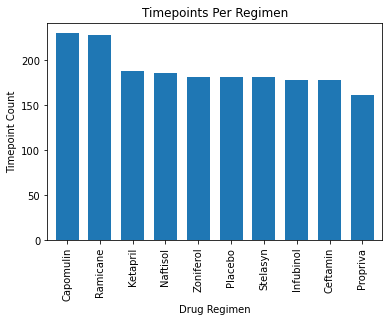

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_plot = mouse_data_complete['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)


bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Timepoint Count")
bar_plot.set_title("Timepoints Per Regimen")


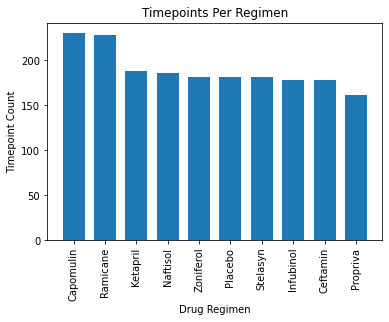

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

counts = mouse_data_complete['Drug Regimen'].value_counts()

x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, width = 0.7, zorder=3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint Count")
plt.title('Timepoints Per Regimen')

plt.show()

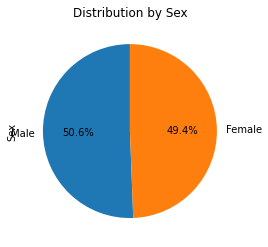

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


data = mouse_data_complete['Sex'].value_counts()

pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')


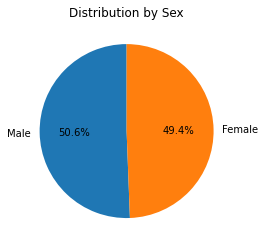

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

data = mouse_data_complete['Sex'].value_counts()

plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


max_tp_df = pd.DataFrame(mouse_data_complete.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
max_tp_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(mouse_data_complete, max_tp_df, on='Mouse ID')
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

drug_values = []
    
for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['Max Timepoint']]
    
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    #IQR for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


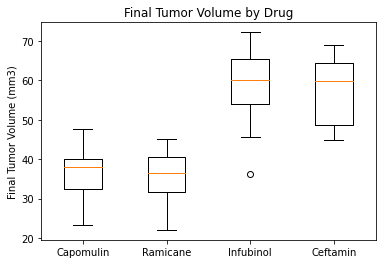

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(drug_values)

plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

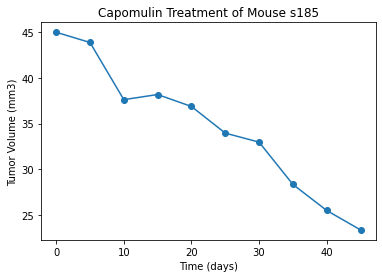

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin

mouse_id = mouse_data_complete.loc[mouse_data_complete['Drug Regimen'] == 'Capomulin']
mouse_id
#mouse ID = s185

mouse = mouse_data_complete.loc[mouse_data_complete['Mouse ID'] == 's185']

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()


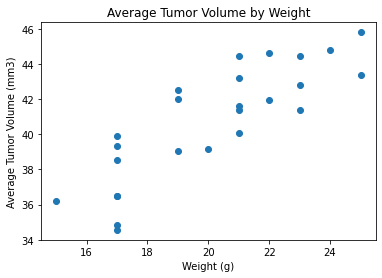

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Capomulin regimen
capomulin_df = mouse_data_complete.loc[mouse_data_complete['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['Average Tumor Volume']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume for the mice receiving the Capomulin regimen is 0.84.


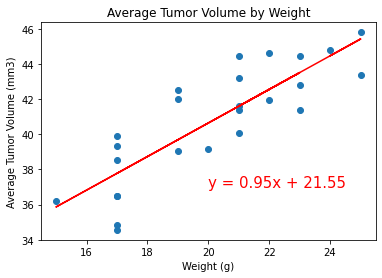

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)

print(f"The correlation between weight and average tumor volume for the mice receiving the Capomulin regimen is {round(correlation[0],2)}.")

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()
